In [48]:
import chipwhisperer as cw
import matplotlib.pyplot as plt
import time
import struct
import random

In [49]:
#Scope setup
scope = cw.scope()
scope.default_setup()

target = cw.target(scope, cw.targets.SimpleSerial2) #cw.targets.SimpleSerial can be omitted
#MY CHANGES - changed target to SimpleSerial2 - to be able to send_cmd

In [3]:
%%bash
cd version_02/
make PLATFORM='CWLITEARM' CRYPTO_TARGET=NONE

SS_VER set to SS_VER_2_1
rm -f -- simpleserial-target-CWLITEARM.hex
rm -f -- simpleserial-target-CWLITEARM.eep
rm -f -- simpleserial-target-CWLITEARM.cof
rm -f -- simpleserial-target-CWLITEARM.elf
rm -f -- simpleserial-target-CWLITEARM.map
rm -f -- simpleserial-target-CWLITEARM.sym
rm -f -- simpleserial-target-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- main.s network.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- main.d network.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- main.i network.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOS

In file included from main.c:12:
network_config.h:15:6: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   15 | void init_weights() {
      |      ^~~~~~~~~~~~
main.c: In function 'handle':
main.c:47:10: warning: unused variable 'random_dummy_operations_indices' [-Wunused-variable]
   47 |   int ***random_dummy_operations_indices = NULL;
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


.
Compiling C: network.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_2_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/network.lst -I./simpleserial/ -I./hal -I./hal/stm32f3 -I./hal/stm32f3/CMSIS -I./hal/stm32f3/CMSIS/core -I./hal/stm32f3/CMSIS/device -I./hal/stm32f4/Legacy -std=gnu99  -MMD -MP -MF .dep/network.o.d network.c -o objdir/network.o


network.c: In function 'forward_shuffled_NO_AAE_RDO':
network.c:423:13: warning: variable 'result' set but not used [-Wunused-but-set-variable]
  423 |     uint8_t result, scmd = 16;
      |             ^~~~~~
network.c:421:10: warning: variable 'rand_dummy_ops_idx' set but not used [-Wunused-but-set-variable]
  421 |     int *rand_dummy_ops_idx;
      |          ^~~~~~~~~~~~~~~~~~
network.c:415:15: warning: unused variable 'k' [-Wunused-variable]
  415 |     int i, j, k, nidx = 0;
      |               ^
network.c:415:12: warning: unused variable 'j' [-Wunused-variable]
  415 |     int i, j, k, nidx = 0;
      |            ^
network.c:415:9: warning: unused variable 'i' [-Wunused-variable]
  415 |     int i, j, k, nidx = 0;
      |         ^


.
Compiling C: ./simpleserial/simpleserial.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_2_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -Os -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/simpleserial.lst -I./simpleserial/ -I./hal -I./hal/stm32f3 -I./hal/stm32f3/CMSIS -I./hal/stm32f3/CMSIS/core -I./hal/stm32f3/CMSIS/device -I./hal/stm32f4/Legacy -std=gnu99  -MMD -MP -MF .dep/simpleserial.o.d ./simpleserial/simpleserial.c -o objdir/simpleserial.o
.
Compiling C: ./hal/stm32f3/stm32f3_hal.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_2_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -

In [50]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "version_02/simpleserial-target-CWLITEARM.hex")

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 16167 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 16167 bytes


In [51]:
def random_float(min_val, max_val):
    # Generate a random float between min_val and max_val
    rand_float = random.uniform(min_val, max_val)
    # Round to 2 decimal places
    return round(rand_float, 2)

In [52]:
def float_to_bytearray_32bit_little_edian(f):
    # Pack the float as a 32-bit (4-byte) IEEE 754 floating point number
    packed = struct.pack('f', f)
    # Convert to bytearray
    return bytearray(packed)

In [53]:
def scope_setup(samples=24431, decimate=2):
    # arm the scope
    scope.arm()
    
    # Set the maximum number of points in a trace
    scope.adc.fifo_fill_mode = "normal"
    scope.adc.samples = samples
    scope.adc.decimate = decimate

In [54]:
def capture_trace(cmd_data, cmd='p', prints=True):
    scope.arm()
    # flush the UART buffer
    target.flush()
    
    target.send_cmd(cmd, 0x80, cmd_data)
    ret = scope.capture()
    trace = scope.get_last_trace()
    
    returned_data = target.read_cmd('r')
    ack = target.read_cmd('e')
    if prints:
        print(returned_data)
        print(ack)
    return trace
    

In [55]:
def plot_trace(trace, save=False, fig_name='figure.svg'):
    # Plot the trace
    plt.plot(trace, linewidth=0.8)
    if save:
        plt.savefig('figure.svg', format='svg')
    plt.show()

In [56]:
scope_setup(decimate=1)

In [57]:
float_val = -0.657
float_bytearray = float_to_bytearray_32bit_little_edian(float_val)

data = bytearray([0x42] * 4)
print(data)
print(float_bytearray)

trace_wave = capture_trace(float_bytearray)
trace = cw.Trace(wave=trace_wave, textin=None, textout=None, key=None)

bytearray(b'BBBB')
bytearray(b"\'1(\xbf")
CWbytearray(b'00 72 04 27 31 28 bf 63 00')
CWbytearray(b'00 65 01 00 eb 00')


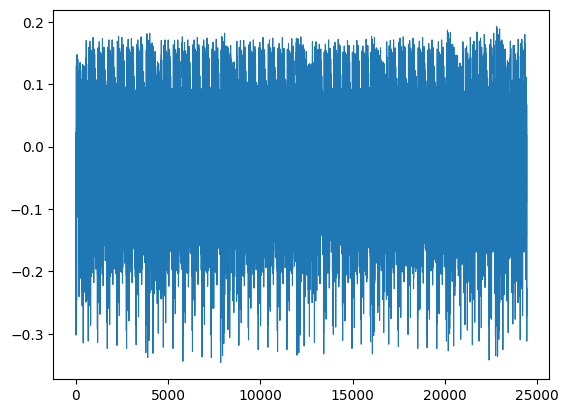

In [58]:
plot_trace(trace_wave)


### Initialize the project

The Chipwhisperer `Project` class can be used to keep a collection of traces. 

In [42]:
proj = cw.create_project("project-04")

In [43]:
input_vals = []
for i in range(1000):
    input_vals.append(random_float(-5, 5))

print(max(input_vals))
print(min(input_vals))

5.0
-4.97


In [44]:
start = time.time()
for i in range(1000):
    cmd_data = float_to_bytearray_32bit_little_edian(input_vals[i])
    
    trace_wave = capture_trace(cmd_data=cmd_data, prints=False)
    trace = cw.Trace(wave=trace_wave, textin=input_vals[i], textout=None, key=None)
    proj.traces.append(trace)

end = time.time()
print(end - start)

31.545708656311035


In [45]:
proj.save()
proj.close()

In [46]:
proj = cw.open_project("project-04")

In [47]:
print(len(proj.traces))

1000


In [41]:
trace_waves_arr = []
for trace in proj.traces:
    trace_waves_arr.append(trace.wave)

In [47]:
if len(set(trace_waves_arr)) == len(trace_waves_arr):
    print("Traces are all unique!")
else:
    unique_traces = len(set(trace_waves_arr))
    print("Not all traces are unique")
    print("There are {unique_traces} unique traces")

TypeError: unhashable type: 'memmap'